# Questions to be answered:

## Regarding Pitches

1. Gather the Data of World Cup Venues.
2. Store and Analyze the Data of Venues.
3. How many mathces are played in those venues after 2012?
4. Out of those, How many does each Team won?
5. What's the winning Percentage of WC Teams?
6. Does Batting First or Second matters in these pitches?
7. What's the average Score necessary to win matches in these Venues?
8. Which Team gets benifit of these Pitches?
9. What are average number of wickets taken per innigs in these Pitches?
10. What are highest Run Scoring Pitches?

## Regarding Batsmen

11. Who are the Best Batsmen to be watched this WC?
12. How many Batsmen have an Average above 40?
13. Who has the Best Batting Average?
14. Who are the top 5 Best Batsman based on Average?
15. Who has the Best Strike Rate?
16. Who are the top 5 Best Batsman based on Strike Rate?
17. Who scored most number of Boundaries?
18. Which Team has most number of Best Batsman?

## Regarding Bowlers

19. Who are the Best Bowlers to be watched this WC?
20. How many Bowlers have an Average less than 40?
21. Who has the Best Bowling Average?
22. Who are the top 5 Best Bowlers based on Average?
23. Who has the Best Strike Rate?
24. Who are the top 5 Best Bowlers based on Strike Rate?
25. Who has the best Economy?
26. Which Team has most number of Best Bowlers?


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

In [207]:
grounds = pd.read_csv('/Users/admin/my-documents/data-set/cricket-world-cup-2019-players-data/Ground_Averages.csv')
odi_match_results = pd.read_csv('/Users/admin/my-documents/data-set/cricket-world-cup-2019-players-data/ODI_Match_Results.csv')
odi_match_totals = pd.read_csv('/Users/admin/my-documents/data-set/cricket-world-cup-2019-players-data/ODI_Match_Totals.csv')
bowler_data = pd.read_csv('/Users/admin/my-documents/data-set/cricket-world-cup-2019-players-data/Bowler_data.csv')
batsman_data = pd.read_csv('/Users/admin/my-documents/data-set/cricket-world-cup-2019-players-data/Batsman_data.csv')
wc_players = pd.read_csv('/Users/admin/my-documents/data-set/cricket-world-cup-2019-players-data/WC_Players.csv')

In [708]:
print(grounds.shape)
print(odi_match_results.shape)
print(odi_match_totals.shape)
print(bowler_data.shape)
print(batsman_data.shape)
print(wc_players.shape)

(106, 11)
(1322, 12)
(1296, 13)
(11118, 14)
(11149, 13)
(152, 3)


In [713]:
grounds.head(2)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60


In [714]:
odi_match_results.head(2)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6


In [718]:
odi_match_totals.head(2)

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6


In [715]:
bowler_data.head(2)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619


In [716]:
batsman_data.head(2)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619


In [717]:
wc_players.head(2)

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan


# England grounds
VENUES - GROUNDS LIST

- The Oval, London
- Trent Bridge, Nottingham
- Sophia Gardens, Cardiff
- County Ground, Bristol
- Rose Bowl, Southampton
- County Ground, Taunton
- Old Trafford, Manchester
- Edgbaston, Birmingham
- Headingley, Leeds
- Lord's, London
- Riverside Ground, Chester-le-Street

In [14]:
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

In [16]:
#Total Grounds
WC_Ground_Stats = []
ODI_Grounds = odi_match_totals.Ground
for i in ODI_Grounds:
    for j in WC_venue_pitches:
        if i in j:
            #print("i ; ",i,"--j : ",j)
            WC_Ground_Stats.append((i,j))

In [17]:
Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Birmingham': 'Edgbaston, Birmingham',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Southampton': 'Rose Bowl, Southampton',
 'Manchester': 'Old Trafford, Manchester',
 'Leeds': 'Headingley, Leeds',
 'The Oval': 'The Oval, London',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Bristol': 'County Ground, Bristol',
 "Lord's": "Lord's, London",
 'Nottingham': 'Trent Bridge, Nottingham'}

In [25]:
odi_match_results[odi_match_results['Ground']=='Birmingham']

result = odi_match_results[odi_match_results.apply(lambda x: x['Ground'] == 'Birmingham' and x['Country']=='India' and x['Opposition']=='v England', axis=1)]
result

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
109,703,won,5 runs,NaN,lost,1st,v England,Birmingham,23 Jun 2013,ODI # 3377,India,6
355,742,won,9 wickets,117.0,won,2nd,v England,Birmingham,2 Sep 2014,ODI # 3523,India,6


# Observations from heatmap of odi match totals data
- There is high correlation of 56% between 'overs' and 'target'. that means if more overs are bowled, then target would increase as well

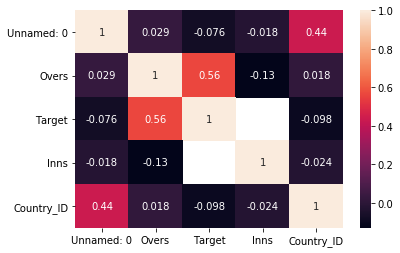

In [29]:
sns.heatmap(odi_match_totals.corr(),annot=True)

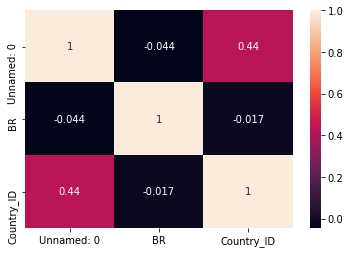

In [30]:
sns.heatmap(odi_match_results.corr(), annot=True)

# Observations from heatmap of grounds data
- Average and RPO(Runs per over) are highly correlated which makes sense. If runs per over increases, average also increases
- There is 99% correlation between matches won and runs scored. so if high number of runs are scored on a ground, high chances of winning are there which makes total sense
- There is 99% correlation between matches played and wickets on that ground. if more matches are played, more number of wickets would be there which is as expected
- There is 99% correlation between runs and matches played. again if more number of matches are played, more runs would be scored
- There is 99% correlation between runs scored and wickets on a ground. If more runs are scored, then there is high chance of falling wickets which is again as expected
- There is 99% correlation between balls being balled and runs being scored on a ground. If more balls are balled, there is high chance of runs being scored on that ground 

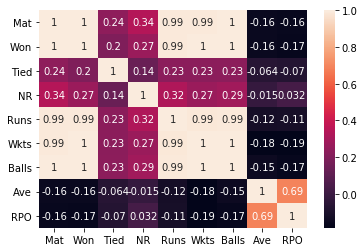

In [33]:
sns.heatmap(grounds.corr(),annot=True)

# Q3 Maximum matches at a ground after 2012
- Maximum matches are played at 'The Oval, London'(34) followed by 'Edgbaston, Birmingham'(30) and 'Sophia Garden, Cardiff'(28)

In [49]:
import operator
import collections

ground_matches_count = dict(odi_match_results.groupby('Ground')['Ground'].count())
sorted_x = sorted(ground_matches_count.items(), key=operator.itemgetter(1))
sorted_dict = collections.OrderedDict(sorted_x) 
sorted_dict

OrderedDict([('Aberdeen', 1),
             ('Amstelveen', 1),
             ('Ahmedabad', 2),
             ('Colombo (SSC)', 2),
             ('Galle', 2),
             ('Guwahati', 2),
             ('Jaipur', 2),
             ('Kuala Lumpur', 2),
             ('Mumbai (BS)', 2),
             ('Queenstown', 2),
             ('Sylhet', 2),
             ('Thiruvananthapuram', 2),
             ('Whangarei', 2),
             ('Lahore', 3),
             ('Bengaluru', 4),
             ('Benoni', 4),
             ('Chennai', 4),
             ('East London', 4),
             ('Hyderabad (Deccan)', 4),
             ('Indore', 4),
             ('Mumbai', 4),
             ('Potchefstroom', 4),
             ('Rajkot', 4),
             ('Bloemfontein', 5),
             ('Dehradun', 5),
             ('Greater Noida', 5),
             ('ICCA Dubai', 5),
             ('Kimberley', 5),
             ('Paarl', 5),
             ('Chester-le-Street', 6),
             ('Cuttack', 6),
             ('Kanpur', 

In [285]:
grounds.head(40)


,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16
5,"Nehru Stadium, Kochi - India",2013-2014,3,3,0,0,1384,46,1567,30.08,5.29
6,"Brisbane Cricket Ground, Woolloongabba, Brisba...",2013-2018,8,8,0,0,3671,123,4189,29.84,5.25
7,"JSCA International Stadium Complex, Ranchi - I...",2013-2019,5,4,0,1,2303,68,2522,33.86,5.47
8,"Boland Park, Paarl - South Africa",2013-2018,3,3,0,0,1478,51,1711,28.98,5.18
9,Sydney Cricket Ground - Australia,2013-2019,16,14,0,2,7535,209,7876,36.05,5.74


In [293]:
#list(odi_match_results.itertuples())
#for item in odi_match_results.iteritems 
WC_Grounds_History = odi_match_totals[odi_match_totals.Ground.isin([Ground[0] for Ground in WC_Ground_Stats])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.reset_index()
    


/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,index,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
1,75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
2,76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
3,77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
4,78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5
5,79,846,287/6,50.0,5.74,NaN,1,won,v New Zealand,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,England,1
6,80,286,305,50.0,6.10,332.0,2,lost,v India,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,SouthAfrica,3
7,81,687,331/7,50.0,6.62,NaN,1,won,v South Africa,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,India,6
8,82,9,172/8,40.4,4.22,171.0,2,won,v Pakistan,"The Oval, London",7 Jun 2013,ODI # 3364,WestIndies,4
9,83,422,170,48.0,3.54,NaN,1,lost,v West Indies,"The Oval, London",7 Jun 2013,ODI # 3364,Pakistan,7


In [305]:
ground_stats = WC_Grounds_History.groupby('Ground')['Ground'].count()
ground_stats

Ground
County Ground, Bristol                  7
Edgbaston, Birmingham                  30
Headingley, Leeds                      12
Lord's, London                         13
Old Trafford, Manchester               12
Riverside Ground, Chester-le-Street     6
Rose Bowl, Southampton                 16
Sophia Gardens, Cardiff                28
The Oval, London                       34
Trent Bridge, Nottingham               18
Name: Ground, dtype: int64

In [316]:
len(ground_stats.index)

10

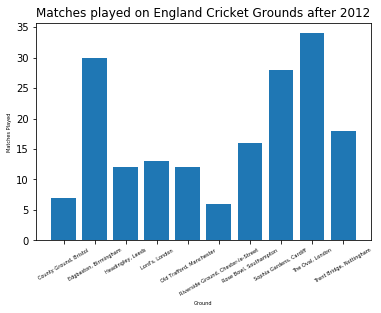

In [318]:
## Bar graph using matplotlib
import matplotlib.pyplot as plt
# this is for plotting purpose
index = np.arange(len(ground_stats.index))
plt.bar(index, ground_stats.values)
plt.xlabel('Ground', fontsize=5)
plt.ylabel('Matches Played', fontsize=5)
plt.xticks(index, list(ground_stats.index), fontsize=5, rotation=30)
plt.title('Matches played on England Cricket Grounds after 2012')
plt.show()

In [387]:
## Bar Graph using plotly
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=ground_stats.index,
            y=ground_stats.values,
            text=ground_stats.values,
            textposition = 'auto',
            marker=dict(
                color='blue',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6
    )]

layout = go.Layout(
    title='Matches played on England Cricket Grounds after 2012',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

/Users/admin/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Q4 Matches played and won by each team on England grounds

In [347]:
def findMatchesWon(country):
    country_played = WC_Grounds_History['Country'] == country
    won = WC_Grounds_History['Result']=='won'
    country_stats = WC_Grounds_History[country_played & won].groupby('Ground')['Ground'].count()
    return country_stats

def findMatchesPlayed(country):
    return WC_Grounds_History[WC_Grounds_History['Country'] == country].groupby('Ground')['Ground'].count()

In [351]:
## New Zealand
matches_won_nz = findMatchesWon('Newzealad')
matches_won_nz

Ground
Lord's, London             1
Rose Bowl, Southampton     2
Sophia Gardens, Cardiff    1
The Oval, London           1
Name: Ground, dtype: int64

In [352]:
matches_played_nz = findMatchesPlayed('Newzealad')
matches_played_nz

Ground
Edgbaston, Birmingham                  3
Lord's, London                         1
Riverside Ground, Chester-le-Street    1
Rose Bowl, Southampton                 2
Sophia Gardens, Cardiff                4
The Oval, London                       1
Trent Bridge, Nottingham               2
Name: Ground, dtype: int64

In [377]:
## Win percentage of NZ in england
win_per_nz = (matches_won_nz.values.sum() / matches_played_nz.values.sum()) * 100
win_per_nz

35.714285714285715

In [353]:
## England
matches_won_en = findMatchesWon('England')
matches_won_en

Ground
County Ground, Bristol                 3
Edgbaston, Birmingham                  4
Headingley, Leeds                      5
Lord's, London                         3
Old Trafford, Manchester               4
Riverside Ground, Chester-le-Street    2
Rose Bowl, Southampton                 4
Sophia Gardens, Cardiff                5
The Oval, London                       6
Trent Bridge, Nottingham               5
Name: Ground, dtype: int64

In [354]:
matches_played_en = findMatchesPlayed('England')
matches_played_en

Ground
County Ground, Bristol                 4
Edgbaston, Birmingham                  8
Headingley, Leeds                      6
Lord's, London                         7
Old Trafford, Manchester               6
Riverside Ground, Chester-le-Street    3
Rose Bowl, Southampton                 8
Sophia Gardens, Cardiff                8
The Oval, London                       9
Trent Bridge, Nottingham               9
Name: Ground, dtype: int64

In [378]:
## Win percentage of ENGLAND in england
win_per_en = (matches_won_en.values.sum() / matches_played_en.values.sum()) * 100
win_per_en

60.29411764705882

In [355]:
## Australia
matches_won_aus = findMatchesWon('Australia')
matches_won_aus

Ground
Lord's, London              1
Old Trafford, Manchester    2
Rose Bowl, Southampton      2
Name: Ground, dtype: int64

In [356]:
matches_played_aus = findMatchesPlayed('Australia')
matches_played_aus

Ground
Edgbaston, Birmingham                  5
Headingley, Leeds                      1
Lord's, London                         1
Old Trafford, Manchester               4
Riverside Ground, Chester-le-Street    1
Rose Bowl, Southampton                 2
Sophia Gardens, Cardiff                2
The Oval, London                       3
Trent Bridge, Nottingham               1
Name: Ground, dtype: int64

In [379]:
## Win percentage of Australia in england
win_per_aus = (matches_won_aus.values.sum() / matches_played_aus.values.sum()) * 100
win_per_aus

25.0

In [357]:
## India
matches_won_india = findMatchesWon('India')
matches_won_india

Ground
Edgbaston, Birmingham       5
Sophia Gardens, Cardiff     3
The Oval, London            2
Trent Bridge, Nottingham    2
Name: Ground, dtype: int64

In [358]:
matches_played_india = findMatchesPlayed('India')
matches_played_india

Ground
Edgbaston, Birmingham       5
Headingley, Leeds           2
Lord's, London              1
Sophia Gardens, Cardiff     3
The Oval, London            4
Trent Bridge, Nottingham    2
Name: Ground, dtype: int64

In [380]:
## Win percentage of India in england
win_per_india = (matches_won_india.values.sum() / matches_played_india.values.sum()) * 100
win_per_india

70.58823529411765

In [375]:
## West Indies
matches_won_wi = findMatchesWon('WestIndies')
matches_won_wi

Ground
The Oval, London    1
Name: Ground, dtype: int64

In [374]:
matches_played_wi = findMatchesPlayed('WestIndies')
matches_played_wi

Ground
County Ground, Bristol      1
Old Trafford, Manchester    1
Rose Bowl, Southampton      1
Sophia Gardens, Cardiff     1
The Oval, London            3
Trent Bridge, Nottingham    1
Name: Ground, dtype: int64

In [376]:
## Win percentage of WI in england
win_per_wi = (matches_won_wi.values.sum() / matches_played_wi.values.sum()) * 100
win_per_wi

12.5

In [361]:
## South Africa
matches_won_sa = findMatchesWon('SouthAfrica')
matches_won_sa

Ground
Edgbaston, Birmingham    1
Lord's, London           1
The Oval, London         1
Name: Ground, dtype: int64

In [362]:
matches_played_sa = findMatchesPlayed('SouthAfrica')
matches_played_sa

Ground
Edgbaston, Birmingham      2
Headingley, Leeds          1
Lord's, London             1
Rose Bowl, Southampton     1
Sophia Gardens, Cardiff    2
The Oval, London           3
Name: Ground, dtype: int64

In [381]:
## Win percentage of SA in england
win_per_sa = (matches_won_sa.values.sum() / matches_played_sa.values.sum()) * 100
win_per_sa

30.0

In [363]:
## Sri Lanka
matches_won_sl = findMatchesWon('SriLanka')
matches_won_sl

Ground
Edgbaston, Birmingham                  1
Lord's, London                         1
Riverside Ground, Chester-le-Street    1
The Oval, London                       3
Name: Ground, dtype: int64

In [364]:
matches_played_sl = findMatchesPlayed('SriLanka')
matches_played_sl

Ground
County Ground, Bristol                 1
Edgbaston, Birmingham                  2
Lord's, London                         1
Old Trafford, Manchester               1
Riverside Ground, Chester-le-Street    1
Sophia Gardens, Cardiff                4
The Oval, London                       6
Trent Bridge, Nottingham               1
Name: Ground, dtype: int64

In [382]:
## Win percentage of SL in england
win_per_sl = (matches_won_sl.values.sum() / matches_played_sl.values.sum()) * 100
win_per_sl

35.294117647058826

In [365]:
## Pakistan
matches_won_pak = findMatchesWon('Pakistan')
matches_won_pak

Ground
Edgbaston, Birmingham      1
Sophia Gardens, Cardiff    3
The Oval, London           1
Name: Ground, dtype: int64

In [366]:
matches_played_pak = findMatchesPlayed('Pakistan')
matches_played_pak

Ground
County Ground, Bristol      1
Edgbaston, Birmingham       4
Headingley, Leeds           2
Lord's, London              1
Rose Bowl, Southampton      2
Sophia Gardens, Cardiff     3
The Oval, London            3
Trent Bridge, Nottingham    2
Name: Ground, dtype: int64

In [383]:
## Win percentage of PAK in england
win_per_pak = (matches_won_pak.values.sum() / matches_played_pak.values.sum()) * 100
win_per_pak

27.77777777777778

In [367]:
## Afghanistan
matches_won_afg = findMatchesWon('Afghanistan')
matches_won_afg

Series([], Name: Ground, dtype: int64)

In [368]:
matches_played_af = findMatchesPlayed('Afghanistan')
matches_played_af

Series([], Name: Ground, dtype: int64)

In [369]:
## Bangladesh
matches_won_ban = findMatchesWon('Bangladesh')
matches_won_ban

Ground
Sophia Gardens, Cardiff    1
Name: Ground, dtype: int64

In [370]:
matches_played_ban = findMatchesPlayed('Bangladesh')
matches_played_ban

Ground
Edgbaston, Birmingham      1
Sophia Gardens, Cardiff    1
The Oval, London           2
Name: Ground, dtype: int64

In [385]:
## Win percentage of Bangladesh in england
win_per_ban = (matches_won_ban.values.sum() / matches_played_ban.values.sum()) * 100
win_per_ban

25.0

In [395]:
## plot graph between all WC teams regarding performance in England after 2012
win_percentage_teams = ['New Zealand', 'England', 'Australia', 'India', 'West Indies', 'South Africa', 'Sri Lanka', 'Pakistan', 'Bangladesh']
win_percentage_values = [win_per_nz, win_per_en, win_per_aus, win_per_india, win_per_wi, win_per_sa, win_per_sl, win_per_pak, win_per_ban]

## Bar Graph using plotly
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=win_percentage_teams,
            y=win_percentage_values,
            text=win_percentage_values,
            textposition = 'auto',
            marker=dict(
                color='green',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.7
    )]

layout = go.Layout(
    title='Win Percentage of WC teams on England Cricket Grounds after 2012',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

/Users/admin/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Q5 Winning Percentage of WC teams

In [398]:
total_matches_won = odi_match_totals[odi_match_totals['Result']=='won'].groupby('Country')['Country'].count()
total_matches_won

Country
Afghanistan    46
Australia      73
Bangladesh     47
England        80
India          99
Newzealad      73
Pakistan       61
SouthAfrica    82
SriLanka       63
WestIndies     39
Name: Country, dtype: int64

In [399]:
total_matches_played = odi_match_totals.groupby('Country')['Country'].count()
total_matches_played

Country
Afghanistan     90
Australia      131
Bangladesh      95
England        145
India          156
Newzealad      129
Pakistan       139
SouthAfrica    135
SriLanka       160
WestIndies     116
Name: Country, dtype: int64

In [425]:
countries = list(total_matches_played.index)

countries

['Afghanistan',
 'Australia',
 'Bangladesh',
 'England',
 'India',
 'Newzealad',
 'Pakistan',
 'SouthAfrica',
 'SriLanka',
 'WestIndies']

In [411]:
win_per_countries = [(total_matches_won[x]/total_matches_played[x] * 100) for x in countries]

In [412]:
win_per_countries

[51.11111111111111,
 55.72519083969466,
 49.473684210526315,
 55.172413793103445,
 63.46153846153846,
 56.58914728682171,
 43.884892086330936,
 60.74074074074074,
 39.375,
 33.62068965517241]

In [426]:
## Remove typo name of new zealand 
countries[5] = 'NewZealand'

In [427]:
## plot graph between all WC teams regarding winning percentage after 2012

## Bar Graph using plotly
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=countries,
            y=win_per_countries,
            text=win_per_countries,
            textposition = 'auto',
            marker=dict(
                color='crimson',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.8
    )]

layout = go.Layout(
    title='Win Percentage of WC teams after 2012',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

/Users/admin/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Q6 Does Batting First or Second matters on pitches where WC matches are to be played?

In [429]:
WC_Grounds_History

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5
79,846,287/6,50.0,5.74,NaN,1,won,v New Zealand,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,England,1
80,286,305,50.0,6.10,332.0,2,lost,v India,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,SouthAfrica,3
81,687,331/7,50.0,6.62,NaN,1,won,v South Africa,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,India,6
82,9,172/8,40.4,4.22,171.0,2,won,v Pakistan,"The Oval, London",7 Jun 2013,ODI # 3364,WestIndies,4
83,422,170,48.0,3.54,NaN,1,lost,v West Indies,"The Oval, London",7 Jun 2013,ODI # 3364,Pakistan,7


In [433]:
bat_first_wins = WC_Grounds_History[(WC_Grounds_History['Inns']==1) & (WC_Grounds_History['Result']=='won')].groupby('Ground')['Ground'].count()
bat_first_wins

Ground
County Ground, Bristol                 1
Edgbaston, Birmingham                  5
Headingley, Leeds                      2
Lord's, London                         4
Old Trafford, Manchester               2
Riverside Ground, Chester-le-Street    1
Rose Bowl, Southampton                 5
Sophia Gardens, Cardiff                6
The Oval, London                       5
Trent Bridge, Nottingham               3
Name: Ground, dtype: int64

In [434]:
bat_second_wins = WC_Grounds_History[(WC_Grounds_History['Inns']==2) & (WC_Grounds_History['Result']=='won')].groupby('Ground')['Ground'].count()
bat_second_wins

Ground
County Ground, Bristol                  2
Edgbaston, Birmingham                   7
Headingley, Leeds                       3
Lord's, London                          3
Old Trafford, Manchester                4
Riverside Ground, Chester-le-Street     2
Rose Bowl, Southampton                  3
Sophia Gardens, Cardiff                 7
The Oval, London                       10
Trent Bridge, Nottingham                4
Name: Ground, dtype: int64

In [435]:
matches_played_per_ground = WC_Grounds_History.groupby('Ground')['Ground'].count()
matches_played_per_ground

Ground
County Ground, Bristol                  7
Edgbaston, Birmingham                  30
Headingley, Leeds                      12
Lord's, London                         13
Old Trafford, Manchester               12
Riverside Ground, Chester-le-Street     6
Rose Bowl, Southampton                 16
Sophia Gardens, Cardiff                28
The Oval, London                       34
Trent Bridge, Nottingham               18
Name: Ground, dtype: int64

In [437]:
nr_matches_per_ground = WC_Grounds_History[(WC_Grounds_History['Result']=='n/r')].groupby('Ground')['Ground'].count()
nr_matches_per_ground

Ground
County Ground, Bristol      2
Edgbaston, Birmingham       6
The Oval, London            4
Trent Bridge, Nottingham    2
Name: Ground, dtype: int64

In [441]:
tied_matches_bat_second_per_ground = WC_Grounds_History[(WC_Grounds_History['Result']=='tied') & (WC_Grounds_History['Inns']==2)].groupby('Ground')['Ground'].count()
tied_matches_bat_second_per_ground

Ground
Sophia Gardens, Cardiff     1
Trent Bridge, Nottingham    1
Name: Ground, dtype: int64

In [440]:
tied_matches_bat_first_per_ground = WC_Grounds_History[(WC_Grounds_History['Result']=='tied') & (WC_Grounds_History['Inns']==1)].groupby('Ground')['Ground'].count()
tied_matches_bat_first_per_ground

Ground
Sophia Gardens, Cardiff     1
Trent Bridge, Nottingham    1
Name: Ground, dtype: int64

In [445]:
## Compare matches won batting first, batting second, tied and n/r using bar chart
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=bat_first_wins.index,
    y=bat_first_wins.values,
    name='Wins Batting First'
)
trace2 = go.Bar(
    x=bat_second_wins.index,
    y=bat_second_wins.values,
    name='Wins Batting Second'
)

trace3 = go.Bar(
    x=nr_matches_per_ground.index,
    y=nr_matches_per_ground.values,
    name='No Result'
)

trace4 = go.Bar(
    x=tied_matches_bat_first_per_ground.index,
    y=tied_matches_bat_first_per_ground.values,
    name='Tied Batting First'
)

trace5 = go.Bar(
    x=tied_matches_bat_second_per_ground.index,
    y=tied_matches_bat_second_per_ground.values,
    name='Tied Batting Second'
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title='Does Batting First or Second matters playing on England pitches??',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

/Users/admin/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [722]:
#County Ground, Bristol
bristol_wins_batting_first = 1/5 * 100
print(bristol_wins_batting_first)

bristol_wins_batting_second = 2/5*100
print(bristol_wins_batting_second)

20.0
40.0


In [720]:
#Edgbaston, Birmingham
birmingham_wins_batting_first = 5/18 * 100


27.77777777777778

# Q7 Average score needed to win on WC venues

In [446]:
WC_Grounds_History

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5
79,846,287/6,50.0,5.74,NaN,1,won,v New Zealand,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,England,1
80,286,305,50.0,6.10,332.0,2,lost,v India,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,SouthAfrica,3
81,687,331/7,50.0,6.62,NaN,1,won,v South Africa,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,India,6
82,9,172/8,40.4,4.22,171.0,2,won,v Pakistan,"The Oval, London",7 Jun 2013,ODI # 3364,WestIndies,4
83,422,170,48.0,3.54,NaN,1,lost,v West Indies,"The Oval, London",7 Jun 2013,ODI # 3364,Pakistan,7


In [483]:
WC_Grounds_History[(WC_Grounds_History['Result']=='won') & (WC_Grounds_History['Inns']==1)].groupby('Ground')[['Ground', 'Score']].groups

{'County Ground, Bristol': Int64Index([965], dtype='int64'),
 'Edgbaston, Birmingham': Int64Index([84, 88, 108, 552, 900], dtype='int64'),
 'Headingley, Leeds': Int64Index([349, 888], dtype='int64'),
 "Lord's, London": Int64Index([299, 599, 878, 1097], dtype='int64'),
 'Old Trafford, Manchester': Int64Index([155, 600], dtype='int64'),
 'Riverside Ground, Chester-le-Street': Int64Index([295], dtype='int64'),
 'Rose Bowl, Southampton': Int64Index([76, 161, 597, 890, 1283], dtype='int64'),
 'Sophia Gardens, Cardiff': Int64Index([81, 101, 335, 720, 904, 1085], dtype='int64'),
 'The Oval, London': Int64Index([102, 294, 553, 898, 927], dtype='int64'),
 'Trent Bridge, Nottingham': Int64Index([79, 739, 1087], dtype='int64')}

In [499]:
first_bat_scores = WC_Grounds_History[(WC_Grounds_History['Result']=='won') & (WC_Grounds_History['Inns']==1)] ['Score']
first_bat_scores


76      359/3
79      287/6
81      331/7
84      269/6
88      234/9
101       169
102     253/8
108     129/7
155     315/7
161       298
294     247/6
295     256/8
299     300/9
335     304/6
349     294/7
552     408/9
553     398/5
597     305/6
599     309/7
600     300/8
720     324/7
739     444/3
878     328/6
888     339/6
890     330/6
898     299/6
900     319/3
904       310
927     338/4
965     369/9
1085    342/8
1087    481/6
1097    322/7
1283    373/3
Name: Score, dtype: object

In [728]:
updated_scores_first_bat = [int(x.split('/', 1)[0]) for x in WC_Grounds_History[(WC_Grounds_History['Result']=='won') & (WC_Grounds_History['Inns']==1)] ['Score']]
updated_scores_first_bat

[359,
 287,
 331,
 269,
 234,
 169,
 253,
 129,
 315,
 298,
 247,
 256,
 300,
 304,
 294,
 408,
 398,
 305,
 309,
 300,
 324,
 444,
 328,
 339,
 330,
 299,
 319,
 310,
 338,
 369,
 342,
 481,
 322,
 373]

In [492]:
avg_score_first_bat_win = sum(updated_scores_first_bat)/len(updated_scores_first_bat)
avg_score_first_bat_win

314.20588235294116

In [503]:
second_bat_scores = WC_Grounds_History[(WC_Grounds_History['Result']=='won') & (WC_Grounds_History['Inns']==2)]['Score']
second_bat_scores

74      231/5
82      172/8
87      139/9
91      236/2
94      297/3
99      102/2
105     179/3
107     182/2
158     231/7
298      73/0
301     222/4
340     228/4
345     212/1
555     306/7
558     350/3
562     192/7
602     304/7
605     140/2
710     256/0
718     309/4
733     194/3
735     255/6
743     252/6
746     304/6
877     127/3
891     156/3
893     308/2
906     119/3
907     322/3
910     268/5
913     240/4
916     193/2
920     237/7
921     215/2
925     265/1
957     210/3
967     258/5
971     294/1
1083    218/7
1089    314/4
1091    208/9
1093    269/2
1100    260/2
1287    359/4
1292    341/7
Name: Score, dtype: object

In [504]:
updated_scores_second_bat = [int(x.split('/', 1)[0]) for x in second_bat_scores]
updated_scores_second_bat

[231,
 172,
 139,
 236,
 297,
 102,
 179,
 182,
 231,
 73,
 222,
 228,
 212,
 306,
 350,
 192,
 304,
 140,
 256,
 309,
 194,
 255,
 252,
 304,
 127,
 156,
 308,
 119,
 322,
 268,
 240,
 193,
 237,
 215,
 265,
 210,
 258,
 294,
 218,
 314,
 208,
 269,
 260,
 359,
 341]

In [505]:
avg_score_second_bat_win = sum(updated_scores_second_bat)/len(updated_scores_second_bat)
avg_score_second_bat_win

234.37777777777777

In [515]:
first_bat_win_scores = {}
updated_win_scores_first_bat = {}
avg_win_score_first_bat_pitch = {}
second_bat_win_scores = {}
updated_win_scores_second_bat = {}
avg_win_score_second_bat_pitch = {}

for pitch in WC_venue_pitches:
    first_bat_win_scores[pitch] = WC_Grounds_History[(WC_Grounds_History['Result']=='won') & (WC_Grounds_History['Inns']==1) & (WC_Grounds_History['Ground']==pitch)] ['Score']
    updated_win_scores_first_bat[pitch] = [int(x.split('/', 1)[0]) for x in first_bat_win_scores[pitch]]
    if (len(updated_win_scores_first_bat[pitch]) != 0):
        avg_win_score_first_bat_pitch[pitch] = sum(updated_win_scores_first_bat[pitch])/len(updated_win_scores_first_bat[pitch])
    else:
        avg_win_score_first_bat_pitch[pitch] = 0
    
    second_bat_win_scores[pitch] = WC_Grounds_History[(WC_Grounds_History['Result']=='won') & (WC_Grounds_History['Inns']==2) & (WC_Grounds_History['Ground']==pitch)] ['Score']
    updated_win_scores_second_bat[pitch] = [int(x.split('/', 1)[0]) for x in second_bat_win_scores[pitch]]
    if (len(updated_win_scores_second_bat[pitch]) != 0):
        avg_win_score_second_bat_pitch[pitch] = sum(updated_win_scores_second_bat[pitch])/len(updated_win_scores_second_bat[pitch])
    else:
        avg_win_score_second_bat_pitch[pitch] = 0


In [517]:
avg_win_score_first_bat_pitch

{'The Oval, London': 307.0,
 'Trent Bridge, Nottingham': 404.0,
 'Sophia Gardens, Cardiff': 296.6666666666667,
 'County Ground, Bristol': 369.0,
 'Rose Bowl, Southampton': 333.0,
 'County Ground, Taunton': 0,
 'Old Trafford, Manchester': 307.5,
 'Edgbaston, Birmingham': 271.8,
 'Headingley, Leeds': 316.5,
 "Lord's, London": 314.75,
 'Riverside Ground, Chester-le-Street': 256.0}

In [518]:
avg_win_score_second_bat_pitch

{'The Oval, London': 249.2,
 'Trent Bridge, Nottingham': 297.0,
 'Sophia Gardens, Cardiff': 225.14285714285714,
 'County Ground, Bristol': 243.0,
 'Rose Bowl, Southampton': 264.6666666666667,
 'County Ground, Taunton': 0,
 'Old Trafford, Manchester': 157.75,
 'Edgbaston, Birmingham': 202.28571428571428,
 'Headingley, Leeds': 272.0,
 "Lord's, London": 214.0,
 'Riverside Ground, Chester-le-Street': 253.0}

# Q8 Which Team gets benifit of these Pitches?

We can see that England has home advantage and clearly they have played more matches than any other team on World Cup Venues

In [519]:
matches_played_en.sum()

68

In [520]:
matches_played_aus.sum()

20

In [522]:
matches_played = [matches_played_en.sum(), matches_played_aus.sum(), matches_played_nz.sum(), matches_played_india.sum(), matches_played_sl.sum(), matches_played_sa.sum(), matches_played_wi.sum(), matches_played_ban.sum(), matches_played_pak.sum(), matches_played_af.sum()]
matches_played

[68, 20, 14, 17, 17, 10, 8, 4, 18, 0]

In [523]:
match_playing_countries = ['England', 'Australia', 'New Zealand', 'India', 'Sri Lanka', 'South Africa', 'West Indies', 'Bangladesh', 'Pakistan', 'Afghanistan']
match_playing_countries

['England',
 'Australia',
 'New Zealand',
 'India',
 'Sri Lanka',
 'South Africa',
 'West Indies',
 'Bangladesh',
 'Pakistan',
 'Afghanistan']

In [524]:
X=match_playing_countries
Y=matches_played

data = [go.Bar(
            x=X,
            y=Y,
            text=Y,
            textposition = 'auto',
            marker=dict(
                color='darkbrown',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.7
    )]

layout = go.Layout(
    title='Matches played by WC teams on WC venues after 2012',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of bar.marker
        Received value: 'darkbrown'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen
      - A number that will be interpreted as a color
        according to bar.marker.colorscale
      - A list or array of any of the above

In [525]:
X=match_playing_countries
Y=matches_played

data = [go.Bar(
            x=X,
            y=Y,
            text=Y,
            textposition = 'auto',
            marker=dict(
                color='burlywood',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.7
    )]

layout = go.Layout(
    title='Matches played by WC teams on WC venues after 2012',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

/Users/admin/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Q9 What are average number of wickets taken per innings in these Pitches?

In [526]:
WC_Ground_Stats

[("Lord's", "Lord's, London"),
 ("Lord's", "Lord's, London"),
 ('Southampton', 'Rose Bowl, Southampton'),
 ('Southampton', 'Rose Bowl, Southampton'),
 ('Nottingham', 'Trent Bridge, Nottingham'),
 ('Nottingham', 'Trent Bridge, Nottingham'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('The Oval', 'The Oval, London'),
 ('The Oval', 'The Oval, London'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('The Oval', 'The Oval, London'),
 ('The Oval', 'The Oval, London'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('The Oval', 'The Oval, London'),
 ('The Oval', 'The Oval, London'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birming

In [527]:
WC_Grounds_History

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5
79,846,287/6,50.0,5.74,NaN,1,won,v New Zealand,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,England,1
80,286,305,50.0,6.10,332.0,2,lost,v India,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,SouthAfrica,3
81,687,331/7,50.0,6.62,NaN,1,won,v South Africa,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,India,6
82,9,172/8,40.4,4.22,171.0,2,won,v Pakistan,"The Oval, London",7 Jun 2013,ODI # 3364,WestIndies,4
83,422,170,48.0,3.54,NaN,1,lost,v West Indies,"The Oval, London",7 Jun 2013,ODI # 3364,Pakistan,7


In [528]:
grounds[(grounds['Ground'].str.contains('England'))]

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
34,"Lord's, London - England",2013-2018,7,7,0,0,3549,110,3851,32.26,5.52
35,"The Rose Bowl, Southampton - England",2013-2019,8,8,0,0,4766,103,4522,46.27,6.32
36,"Trent Bridge, Nottingham - England",2013-2019,9,7,1,1,4944,112,4530,44.14,6.54
37,"Sophia Gardens, Cardiff - England",2013-2018,14,13,1,0,6690,221,7264,30.27,5.52
38,"Kennington Oval, London - England",2013-2019,17,15,0,2,8038,208,8369,38.64,5.76
39,"Edgbaston, Birmingham - England",2013-2017,15,12,0,3,5950,182,6654,32.69,5.36
50,"Old Trafford, Manchester - England",2013-2018,6,6,0,0,2294,87,2627,26.36,5.23
73,"Riverside Ground, Chester-le-Street - England",2014-2018,3,3,0,0,1454,46,1475,31.60,5.91
75,"Headingley, Leeds - England",2014-2019,6,5,0,0,3262,83,3351,39.30,5.84
90,"County Ground, Bristol - England",2016-2019,4,3,0,1,1848,55,1746,33.60,6.35


In [529]:
WC_venue_pitches


['The Oval, London',
 'Trent Bridge, Nottingham',
 'Sophia Gardens, Cardiff',
 'County Ground, Bristol',
 'Rose Bowl, Southampton',
 'County Ground, Taunton',
 'Old Trafford, Manchester',
 'Edgbaston, Birmingham',
 'Headingley, Leeds',
 "Lord's, London",
 'Riverside Ground, Chester-le-Street']

In [674]:
WC_venue_pitches
WC_venue_pitches.remove('County Ground, Taunton')

In [727]:
WC_pitch_data

{'Oval, London': {'Ground': 38    Kennington Oval, London - England
  Name: Ground, dtype: object, 'Wickets': 38    208
  Name: Wkts, dtype: int64, 'Matches': 38    17
  Name: Mat, dtype: int64},
 'Trent Bridge, Nottingham': {'Ground': 36    Trent Bridge, Nottingham - England
  Name: Ground, dtype: object,
  'Wickets': 36    112
  Name: Wkts, dtype: int64,
  'Matches': 36    9
  Name: Mat, dtype: int64},
 'Sophia Gardens, Cardiff': {'Ground': 37    Sophia Gardens, Cardiff - England
  Name: Ground, dtype: object, 'Wickets': 37    221
  Name: Wkts, dtype: int64, 'Matches': 37    14
  Name: Mat, dtype: int64},
 'County Ground, Bristol': {'Ground': 90    County Ground, Bristol - England
  Name: Ground, dtype: object, 'Wickets': 90    55
  Name: Wkts, dtype: int64, 'Matches': 90    4
  Name: Mat, dtype: int64},
 'Rose Bowl, Southampton': {'Ground': 35    The Rose Bowl, Southampton - England
  Name: Ground, dtype: object, 'Wickets': 35    103
  Name: Wkts, dtype: int64, 'Matches': 35    8
  

In [675]:
WC_pitch_data = {}
avg_wickets = []
for pitch in WC_venue_pitches:
    WC_pitch_data[pitch]={}
    WC_pitch_data[pitch]['Ground'] = grounds[(grounds['Ground'].str.contains(pitch))]['Ground']
    WC_pitch_data[pitch]['Wickets'] = grounds[(grounds['Ground'].str.contains(pitch))]['Wkts']
    WC_pitch_data[pitch]['Matches'] = grounds[(grounds['Ground'].str.contains(pitch))]['Mat']
    #print(WC_pitch_data[pitch]['Wickets'][38])
    #avg_wickets.append((WC_pitch_data[pitch]['Wickets'].item()/WC_pitch_data[pitch]['Matches'].item()))

In [725]:
wkts_avg = [int(WC_pitch_data['Oval, London']['Wickets']/WC_pitch_data['Oval, London']['Matches']),int(WC_pitch_data['Trent Bridge, Nottingham']['Wickets']/WC_pitch_data['Trent Bridge, Nottingham']['Matches']), int(WC_pitch_data['Sophia Gardens, Cardiff']['Wickets']/WC_pitch_data['Sophia Gardens, Cardiff']['Matches']), int(WC_pitch_data['County Ground, Bristol']['Wickets']/WC_pitch_data['County Ground, Bristol']['Matches']), int(WC_pitch_data['Rose Bowl, Southampton']['Wickets']/WC_pitch_data['Rose Bowl, Southampton']['Matches']), 0, int(WC_pitch_data['Old Trafford, Manchester']['Wickets']/WC_pitch_data['Old Trafford, Manchester']['Matches']), int(WC_pitch_data['Edgbaston, Birmingham']['Wickets']/WC_pitch_data['Edgbaston, Birmingham']['Matches']), int(WC_pitch_data['Headingley, Leeds']['Wickets']/WC_pitch_data['Headingley, Leeds']['Matches']), int(WC_pitch_data["Lord's, London"]['Wickets']/WC_pitch_data["Lord's, London"]['Matches']), int(WC_pitch_data["Riverside Ground, Chester-le-Street"]['Wickets']/WC_pitch_data["Riverside Ground, Chester-le-Street"]['Matches'])]
wkts_avg

[12, 12, 15, 13, 12, 0, 14, 12, 13, 15, 15]

In [726]:
X=WC_venue_pitches
Y=wkts_avg

data = [go.Bar(
            x=X,
            y=Y,
            text=Y,
            textposition = 'auto',
            marker=dict(
                color='crimson',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.7
    )]

layout = go.Layout(
    title='Average wickets on WC venues after 2012',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')
    

/Users/admin/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Regarding Batsmen

# Q1 Who are the Best Batsmen to be watched this WC?

In [684]:
batsman_data

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619
5,6,0*,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0*,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
7,8,DNB,-,-,-,-,-,v England,Leeds,1 Jul 2011,ODI # 3167,Oshane Thomas,49619
8,9,DNB,-,-,-,-,-,v England,Lord's,3 Jul 2011,ODI # 3168,Oshane Thomas,49619
9,10,1*,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619


In [704]:
[(x['Bat1'] not in ['DNB','TDNB']) for x in batsman_data.iteritems()]

TypeError: tuple indices must be integers or slices, not str